In [13]:
import numpy as np
import pandas as pd

In [14]:
df=pd.read_csv("Social_Network_Ads.csv")

In [15]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [17]:
df.shape

(400, 5)

In [18]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [19]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

no use in id column

In [21]:
df=df.drop("User ID",axis=1)

In [22]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [26]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [28]:
df.dtypes

Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [29]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

feature engineering:

converting the catgorical feature into numerical column

In [24]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})

In [25]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [63]:
from sklearn.model_selection import train_test_split
x=df.drop(['Purchased'], axis=1)
y=df['Purchased'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [64]:
from sklearn.preprocessing import StandardScaler
scaller=StandardScaler()
scaller.fit(x_train)
# x_train=scaller.transform(x_train)
# x_test=scaller.transform(x_test)

StandardScaler()

In [65]:
x_train.columns

Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [55]:
x_train.shape

(320, 3)

In [56]:
x_test.shape

(80, 3)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8500


In [67]:
feature_scores = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

Age                0.530849
EstimatedSalary    0.461286
Gender             0.007865
dtype: float64

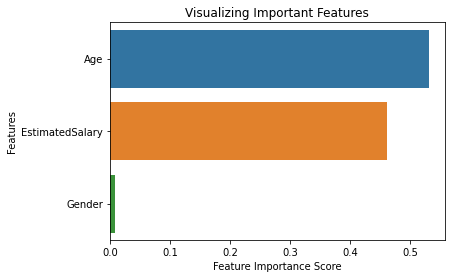

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Build Random Forest model on selected features

In [72]:
from sklearn.model_selection import train_test_split
x=df.drop(['Purchased','EstimatedSalary'], axis=1)
y=df['Purchased'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7875


In [74]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[41  5]
 [12 22]]
